Loading dataset for exploratory data analysis...
Dataset loaded successfully! Shape: (2768, 7)
Dataset shape: (2768, 7)
Columns: ['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise']

BASIC DATASET INFORMATION
Total samples: 2768
Columns: ['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise']
Data types:
id          object
text        object
anger        int64
fear         int64
joy          int64
sadness      int64
surprise     int64
dtype: object

Missing values:
id          0
text        0
anger       0
fear        0
joy         0
sadness     0
surprise    0
dtype: int64

First 5 samples:

EMOTION DISTRIBUTION ANALYSIS
Emotion frequencies:
Fear: 1611 (58.2%)
Sadness: 878 (31.72%)
Surprise: 839 (30.31%)
Joy: 674 (24.35%)
Anger: 333 (12.03%)


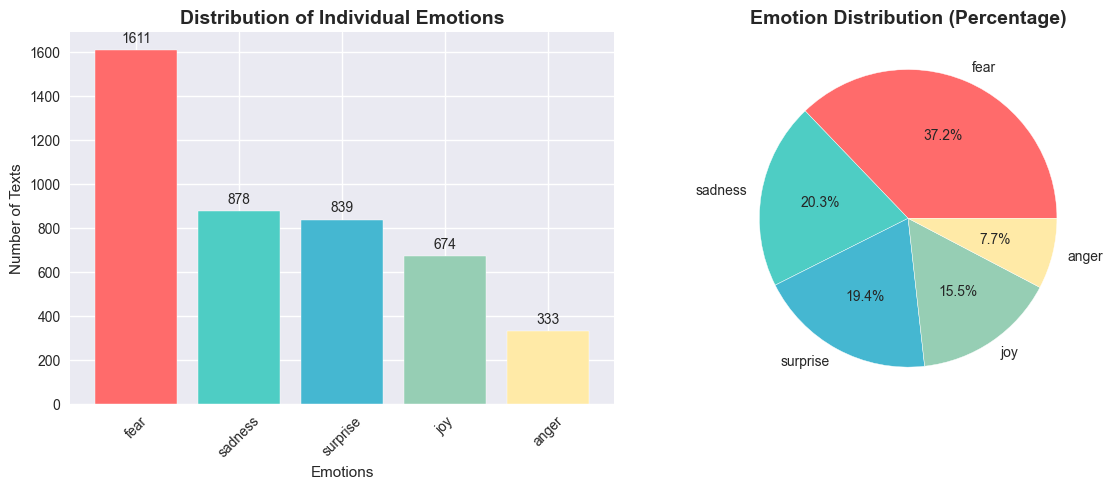


MULTI-LABEL ANALYSIS
Average emotions per text: 1.57
Maximum emotions in a single text: 5
Minimum emotions in a single text: 0

Distribution of number of emotions per text:
0 emotions: 239 texts (8.6%)
1 emotions: 1141 texts (41.2%)
2 emotions: 1031 texts (37.2%)
3 emotions: 298 texts (10.8%)
4 emotions: 57 texts (2.1%)
5 emotions: 2 texts (0.1%)


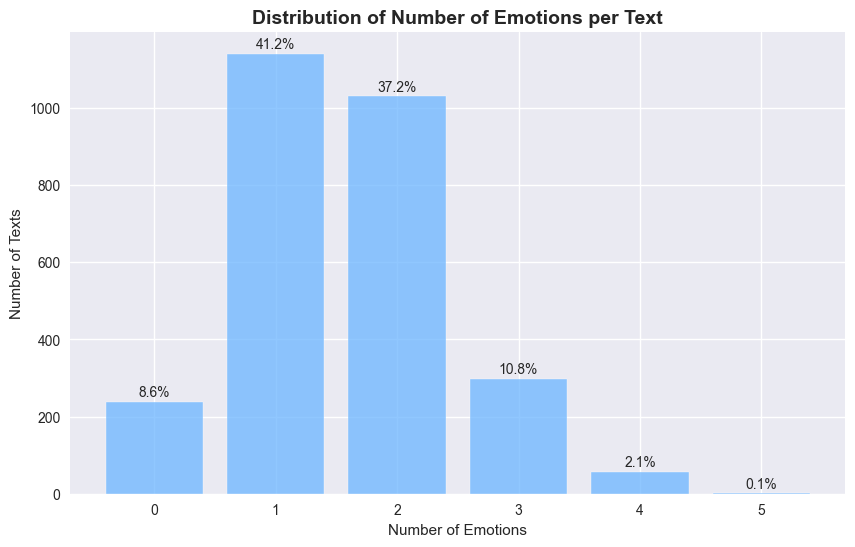


TEXT LENGTH ANALYSIS
Text length statistics:
Average characters: 78.4
Average words: 15.5
Max characters: 450
Max words: 89
Min characters: 13
Min words: 1


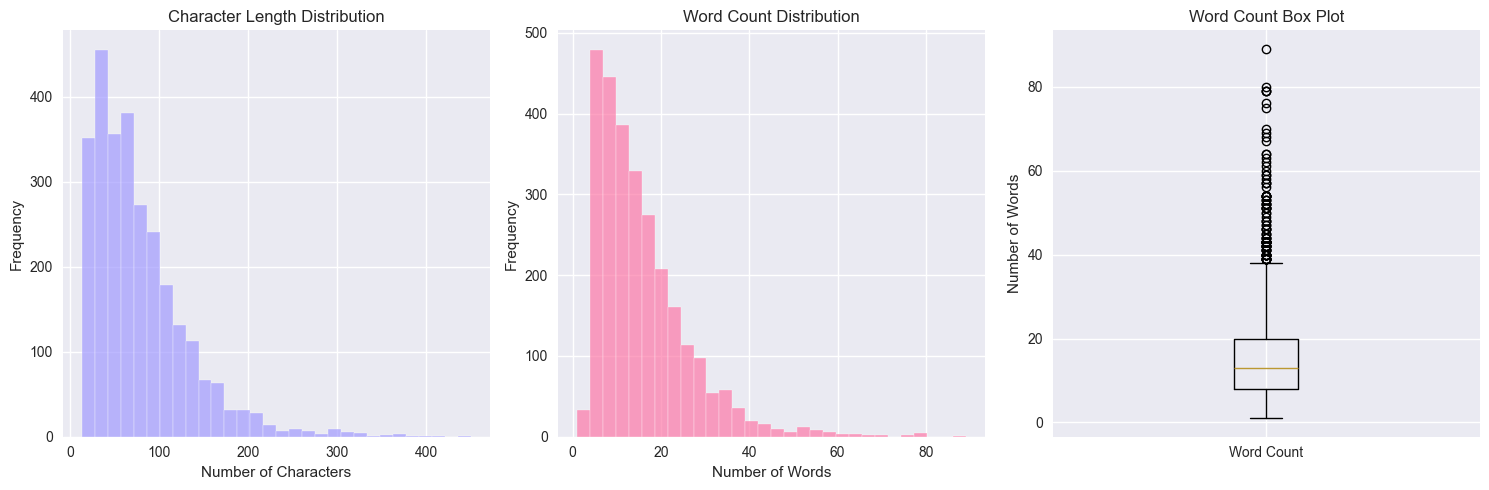


EMOTION CO-OCCURRENCE ANALYSIS
Emotion correlation matrix:
          anger   fear    joy  sadness  surprise
anger     1.000  0.102 -0.192    0.115     0.027
fear      0.102  1.000 -0.492    0.269     0.154
joy      -0.192 -0.492  1.000   -0.302    -0.087
sadness   0.115  0.269 -0.302    1.000    -0.112
surprise  0.027  0.154 -0.087   -0.112     1.000


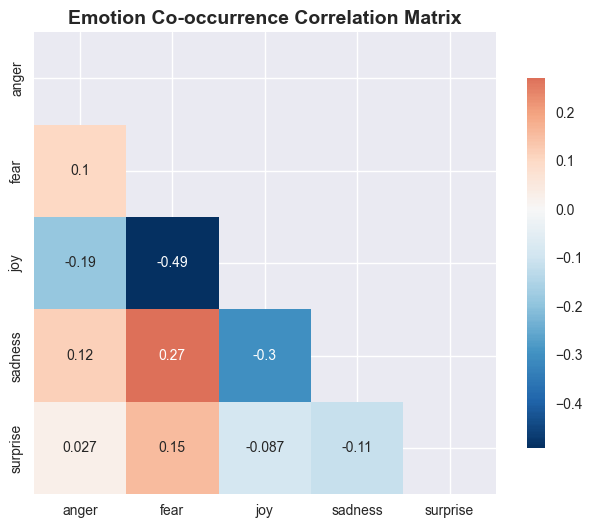


Most common emotion combinations:
joy: 429 (15.5%)
fear+sadness: 412 (14.9%)
fear: 411 (14.8%)
fear+surprise: 324 (11.7%)
No emotions: 239 (8.6%)
sadness: 133 (4.8%)
fear+sadness+surprise: 124 (4.5%)
surprise: 114 (4.1%)
joy+surprise: 108 (3.9%)
anger+fear+sadness: 77 (2.8%)

WORD CLOUD ANALYSIS
Generating word cloud from cleaned texts...


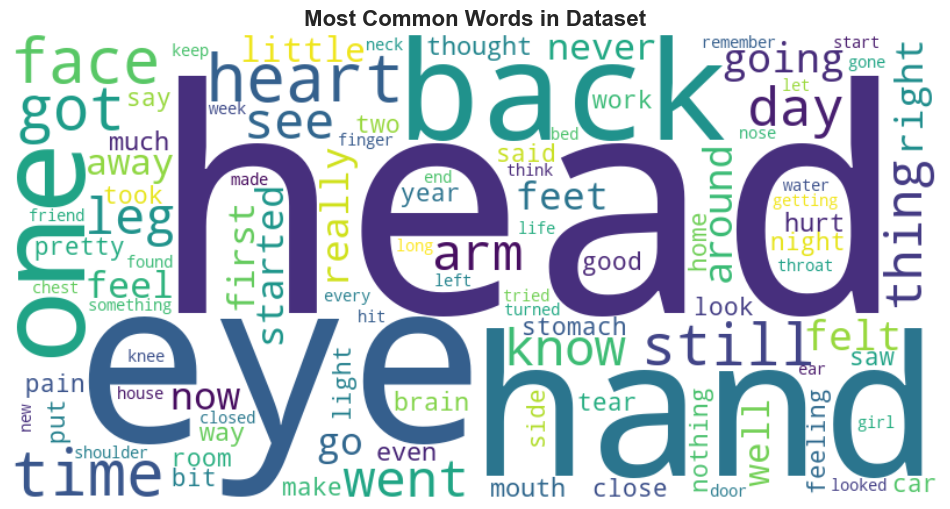


SAMPLE TEXTS FOR EACH EMOTION

ANGER - Sample texts:
1. You know what happens when I get one of these stupid ideas in my head.
2. Not only was I not able to move, I smacked my head against the guy sitting in front me and things just got awkward.
3. I took offense to this because as a supervisor I wanted my team to be in good spirits and wanted them to love coming in to work and doing good things for the mission.

FEAR - Sample texts:
1. Colorado, middle of nowhere.
2. This involved swimming a pretty large lake that was over my head.
3. It was one of my most shameful experiences.

JOY - Sample texts:
1. Hondas are notoriously great cars for long trips for their dependability and great gas mileage.
2. i pushed standing up for a while and emerald crowned, but got pretty tired and laid on the bed on my side while matthias held my leg up and that's how emerald came out!
3. Fortunately the kindly ajeoshis and ajummas that I rented the scooter from helped me get on a bus to the other ferry, 

In [1]:
# Emotion Detection Dataset - Exploratory Data Analysis
# This notebook performs comprehensive EDA on the multi-label emotion dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os
from pathlib import Path

sys.path.append('../src')

# Now import your functions
from data_utils import get_emotion_statistics, load_dataset, clean_text


# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Loading dataset for exploratory data analysis...")

# Load the dataset
df = load_dataset('../data/raw/track-a.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Basic dataset information
print("\n" + "="*50)
print("BASIC DATASET INFORMATION")
print("="*50)

print(f"Total samples: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Display first few samples
print(f"\nFirst 5 samples:")
df.head()

# Emotion distribution analysis
print("\n" + "="*50)
print("EMOTION DISTRIBUTION ANALYSIS")
print("="*50)

emotion_cols = ['anger', 'fear', 'joy', 'sadness', 'surprise']

# Calculate emotion statistics
emotion_counts = df[emotion_cols].sum().sort_values(ascending=False)
emotion_percentages = (emotion_counts / len(df) * 100).round(2)

print("Emotion frequencies:")
for emotion, count in emotion_counts.items():
    percentage = emotion_percentages[emotion]
    print(f"{emotion.capitalize()}: {count} ({percentage}%)")

# Visualize emotion distribution
plt.figure(figsize=(12, 5))

# Bar plot of emotion counts
plt.subplot(1, 2, 1)
bars = plt.bar(emotion_counts.index, emotion_counts.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Distribution of Individual Emotions', fontsize=14, fontweight='bold')
plt.xlabel('Emotions')
plt.ylabel('Number of Texts')
plt.xticks(rotation=45)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height)}', ha='center', va='bottom')

# Pie chart of emotion distribution
plt.subplot(1, 2, 2)
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Emotion Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Multi-label analysis
print("\n" + "="*50)
print("MULTI-LABEL ANALYSIS")
print("="*50)

# Calculate number of emotions per text
df['total_emotions'] = df[emotion_cols].sum(axis=1)

# Statistics about multi-label nature
print(f"Average emotions per text: {df['total_emotions'].mean():.2f}")
print(f"Maximum emotions in a single text: {df['total_emotions'].max()}")
print(f"Minimum emotions in a single text: {df['total_emotions'].min()}")

# Distribution of number of emotions per text
emotion_count_dist = df['total_emotions'].value_counts().sort_index()
print(f"\nDistribution of number of emotions per text:")
for num_emotions, count in emotion_count_dist.items():
    percentage = (count / len(df) * 100)
    print(f"{num_emotions} emotions: {count} texts ({percentage:.1f}%)")

# Visualize multi-label distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(emotion_count_dist.index, emotion_count_dist.values,
               color='#74b9ff', alpha=0.8)
plt.title('Distribution of Number of Emotions per Text', fontsize=14, fontweight='bold')
plt.xlabel('Number of Emotions')
plt.ylabel('Number of Texts')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / len(df) * 100)
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

# Text length analysis
print("\n" + "="*50)
print("TEXT LENGTH ANALYSIS")
print("="*50)

# Calculate text lengths
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print(f"Text length statistics:")
print(f"Average characters: {df['text_length'].mean():.1f}")
print(f"Average words: {df['word_count'].mean():.1f}")
print(f"Max characters: {df['text_length'].max()}")
print(f"Max words: {df['word_count'].max()}")
print(f"Min characters: {df['text_length'].min()}")
print(f"Min words: {df['word_count'].min()}")

# Visualize text length distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['text_length'], bins=30, color='#a29bfe', alpha=0.7)
plt.title('Character Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['word_count'], bins=30, color='#fd79a8', alpha=0.7)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot([df['word_count']], tick_labels=['Word Count'])
plt.title('Word Count Box Plot')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

# Emotion co-occurrence analysis
print("\n" + "="*50)
print("EMOTION CO-OCCURRENCE ANALYSIS")
print("="*50)

# Calculate correlation between emotions
emotion_corr = df[emotion_cols].corr()
print("Emotion correlation matrix:")
print(emotion_corr.round(3))

# Visualize emotion correlations
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(emotion_corr, dtype=bool))
sns.heatmap(emotion_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Emotion Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

# Most common emotion combinations
print(f"\nMost common emotion combinations:")
df['emotion_combo'] = df[emotion_cols].apply(
    lambda x: '+'.join([col for col, val in x.items() if val == 1]), axis=1
)

combo_counts = df['emotion_combo'].value_counts().head(10)
for combo, count in combo_counts.items():
    if combo == '':
        combo = 'No emotions'
    percentage = (count / len(df) * 100)
    print(f"{combo}: {count} ({percentage:.1f}%)")

# Word cloud analysis
print("\n" + "="*50)
print("WORD CLOUD ANALYSIS")
print("="*50)

# Clean texts for word cloud
print("Generating word cloud from cleaned texts...")
cleaned_texts = df['text'].apply(clean_text)
all_text = ' '.join(cleaned_texts[cleaned_texts != ''])

# Generate word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=100).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Dataset', fontsize=16, fontweight='bold')
plt.show()

# Sample texts for each emotion
print("\n" + "="*50)
print("SAMPLE TEXTS FOR EACH EMOTION")
print("="*50)

for emotion in emotion_cols:
    print(f"\n{emotion.upper()} - Sample texts:")
    samples = df[df[emotion] == 1]['text'].head(3)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")

print("\n" + "="*50)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*50)

# Save some key statistics for later use
stats_summary = {
    'total_samples': len(df),
    'emotion_distribution': emotion_counts.to_dict(),
    'avg_text_length': df['text_length'].mean(),
    'avg_word_count': df['word_count'].mean(),
    'multi_label_stats': df['total_emotions'].value_counts().to_dict()
}

print("Key statistics saved for pipeline reference.")